In [1]:
# key = 00ea204558b9356ba4573dc4092970bd

In [2]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import operator

In [3]:
r = requests.get('https://developers.zomato.com/api/v2.1/categories', headers = {'user-key':'00ea204558b9356ba4573dc4092970bd'})
r

<Response [200]>

In [4]:
data = r.json()
data

{'categories': [{'categories': {'id': 1, 'name': 'Delivery'}},
  {'categories': {'id': 2, 'name': 'Dine-out'}},
  {'categories': {'id': 3, 'name': 'Nightlife'}},
  {'categories': {'id': 4, 'name': 'Catching-up'}},
  {'categories': {'id': 5, 'name': 'Takeaway'}},
  {'categories': {'id': 6, 'name': 'Cafes'}},
  {'categories': {'id': 7, 'name': 'Daily Menus'}},
  {'categories': {'id': 8, 'name': 'Breakfast'}},
  {'categories': {'id': 9, 'name': 'Lunch'}},
  {'categories': {'id': 10, 'name': 'Dinner'}},
  {'categories': {'id': 11, 'name': 'Pubs & Bars'}},
  {'categories': {'id': 13, 'name': 'Pocket Friendly Delivery'}},
  {'categories': {'id': 14, 'name': 'Clubs & Lounges'}}]}

In [10]:
df = pd.read_csv("zomato.csv", encoding = 'ISO-8859-1')


In [5]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [12]:
df1 = df[df['Country Code'] ==1]
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
627,3400021,Chokho Jeeman Marwari Jain Bhojanalya,1,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,Rajasthani,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
628,3400017,Pinch Of Spice,1,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,"North Indian, Chinese, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177
629,3400325,MoMo Cafe,1,Agra,"Courtyard by Marriott Agra, Phase 2, Fatehabad...","Courtyard by Marriott Agra, Tajganj","Courtyard by Marriott Agra, Tajganj, Agra",0.000000,0.000000,"North Indian, European",...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,45
630,3400059,Peshawri - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,4.3,Green,Very Good,133
631,3400060,Taj Bano - ITC Mughal,1,Agra,"ITC Mughal, Fatehabad Road, Tajganj, Agra","ITC Mughal, Tajganj","ITC Mughal, Tajganj, Agra",78.044095,27.160934,Mughlai,...,Indian Rupees(Rs.),No,No,No,No,4,4.0,Green,Very Good,41
632,3400348,G Thal,1,Agra,"3/20, KPS Tower, Near Tulsi Talkies, Bypass Ro...",Khandari,"Khandari, Agra",0.000000,0.000000,"Rajasthani, Gujarati, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,3,3.6,Yellow,Good,59
633,3400072,Dawat-e-Nawab - Radisson Blu,1,Agra,"Radisson Blu, Taj East Gate Road, Tajganj, Agra","Radisson Blu, Tajganj","Radisson Blu, Tajganj, Agra",78.057044,27.163303,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,4,3.8,Yellow,Good,46


## Problem - 1
### The dataset is highly skewed toward the cities included in Delhi-NCR. So, we will summarise all the other cities in Rest of India while those in New Delhi, Ghaziabad, Noida, Gurgaon, Faridabad to Delhi-NCR. Doing this would make our analysis turn toward Delhi-NCR v Rest of India.

#### Plot the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

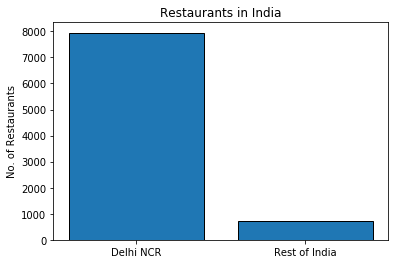

Restaurants in Delhi NCR:  7947
Restaurants in rest of India:  705


In [11]:
a = 0
b = 0
for i in df1.index:
    if df1['City'][i] in ['New Delhi', 'Noida', 'Ghaziabad', 'Gurgaon', 'Faridabad']:
        a += 1
    else:
        b += 1
x = [a, b]
y = ['Delhi NCR', 'Rest of India']
plt.bar(y, x, edgecolor = "black")
plt.ylabel('No. of Restaurants')
plt.title('Restaurants in India')
plt.show()
print('Restaurants in Delhi NCR: ', a)
print('Restaurants in rest of India: ', b)

#### Find the cuisines which are not present in restaurant of Delhi NCR but present in rest of India.Check using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR or just it due to incomplete dataset.

In [10]:
a = set()
b = set()
for i in df1.index:
    temp = df1['Cuisines'][i].split(',')
    if df1['City'][i] in ['New Delhi', 'Noida', 'Ghaziabad', 'Gurgaon', 'Faridabad']:
        for j in temp:
            a.add(j.strip())
    else:
        for j in temp:
            b.add(j.strip())
c = b-a
print('Cuisines that are not available in Delhi NCR restaurants...')
j = 1
for i in c:
    print("%d. " %j, i)
    j += 1

r = requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = {'user-key':'00ea204558b9356ba4573dc4092970bd'}, params = {'city_id':1})

data = r.json()
data = data['cuisines']
x = set()
for i in data:
    x.add(i['cuisine']['cuisine_name'])
print("Above mentioned cuisines are not actually served in Delhi NCR: ",c not in x)

Cuisines that are not available in Delhi NCR restaurants...
1.  German
2.  Malwani
3.  Cajun
4.  BBQ
Above mentioned cuisines are not actually served in Delhi NCR:  True


#### Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

In [145]:
count1 = dict()
count2 = dict()
count = dict()

for i in df1.index:
    temp = df1['Cuisines'][i].split(',')
    if df1['City'][i] in ['New Delhi', 'Noida', 'Ghaziabad', 'Gurgaon', 'Faridabad']:
        for j in temp:
            if j.strip() in count1:
                count1[j.strip()] += 1
            else:
                count1[j.strip()] = 1
    else:
        for j in temp:
            if j.strip() in count2:
                count2[j.strip()] += 1
            else:
                count2[j.strip()] = 1
    for j in temp:
        if j.strip() in count:
            count[j.strip()] += 1
        else:
            count[j.strip()] = 1
            
count = dict(sorted(count.items(), key=operator.itemgetter(1),reverse=True))
count1 = dict(sorted(count1.items(), key=operator.itemgetter(1),reverse=True))
count2 = dict(sorted(count2.items(), key=operator.itemgetter(1),reverse=True))

print('Top 10 cuisines in Delhi NCR...')
a = 0
for key in count1:
    if a == 10:
        break
    print("%d. " %(a+1), key, count1[key])
    a += 1

print()
print('Top 10 cuisines in rest of India...')
a = 0
for key in count2:
    if a == 10:
        break
    print("%d. " %(a+1), key, count2[key])
    a += 1

print()
print('Top 10 cuisines in whole India...')
a = 0
for key in count:
    if a == 10:
        break
    print("%d. " %(a+1), key, count[key])
    a += 1

Top 10 cuisines in Delhi NCR...
1.  North Indian 3597
2.  Chinese 2448
3.  Fast Food 1866
4.  Mughlai 933
5.  Bakery 697
6.  South Indian 569
7.  Continental 547
8.  Desserts 542
9.  Street Food 538
10.  Italian 535

Top 10 cuisines in rest of India...
1.  North Indian 349
2.  Chinese 242
3.  Continental 177
4.  Italian 147
5.  Cafe 136
6.  Fast Food 97
7.  South Indian 62
8.  Mughlai 59
9.  Desserts 55
10.  Mexican 50

Top 10 cuisines in whole India...
1.  North Indian 3946
2.  Chinese 2690
3.  Fast Food 1963
4.  Mughlai 992
5.  Bakery 726
6.  Continental 724
7.  Italian 682
8.  South Indian 631
9.  Cafe 627
10.  Desserts 597


#### Write a short detailed analysis of how cuisine served is different from Delhi NCR to Rest of India. Plot the suitable graph to explain your inference.

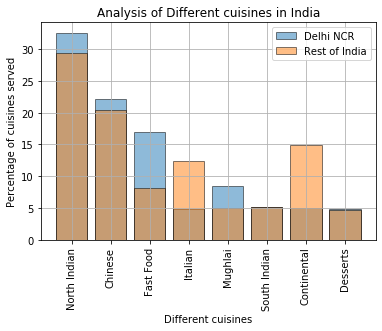

In [14]:
x = [3597, 2448, 1866, 535, 933, 569, 547, 542]
y = [349, 242, 97, 147, 59, 62, 177, 55]

# here we are taking 5 cousines into account which are among the top 10 cuisines of both the regions.
# Those cuisines are:
#     North Indian
#     Chinese
#     Fast Food
#     Italian
#     Mughlai
#     South Indian
#     Continental
#     Desserts

sum1 = sum(x)
sum2 = sum(y)

for i in range(8):
    x[i] = x[i]*100/sum1
    y[i] = y[i]*100/sum2

name = ["North Indian", 'Chinese', 'Fast Food', 'Italian', 'Mughlai', 'South Indian', 'Continental', 'Desserts']
plt.bar(name, x, edgecolor = "black", alpha = 0.5, label = 'Delhi NCR')
plt.bar(name, y, edgecolor = "black", alpha = 0.5, label = 'Rest of India')
plt.legend()
plt.xticks(name, rotation = 90)
plt.xlabel('Different cuisines')
plt.ylabel('Percentage of cuisines served')
plt.grid()
plt.title('Analysis of Different cuisines in India')
plt.show()

## Problem - 2
### User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

#### Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.
1. Number of Votes given Restaurant
2. Restaurant serving more number of cuisines.
3. Average Cost of Restaurant
4. Restaurant serving some specific cuisines.

In [147]:
# For answering this question, I have analysed the data of New Delhi.

1. Number of Votes given Restaurant

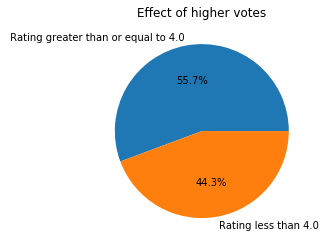

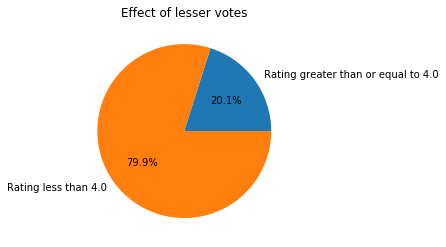

In [18]:
votes1= dict()
rating = dict()
for i in df1.index:
    if df1['City'][i] == 'New Delhi':
        key = df1['Restaurant Name'][i]
        votes1[key] = df1['Votes'][i]
        rating[key] = df1['Aggregate rating'][i]

a = 0
b = 0
c = 0
d = 0
for i in votes1:
    if votes1[i] > 1000:
        if rating[i] >= 4:
            a += 1
        else:
            b += 1
    if votes1[i] < 500 and votes1[i] > 100:
        if rating[i] >= 4:
            c += 1
        else:
            d += 1
x = [a, b]
y = [c, d]

plt.pie(x, labels = [' Rating greater than or equal to 4.0', 'Rating less than 4.0'], autopct = '%.1f%%')
plt.title('Effect of higher votes')
plt.show()
plt.pie(y, labels = [' Rating greater than or equal to 4.0', 'Rating less than 4.0'], autopct = '%.1f%%')
plt.title('Effect of lesser votes')
plt.show()

2. Restaurant serving more number of cuisines.

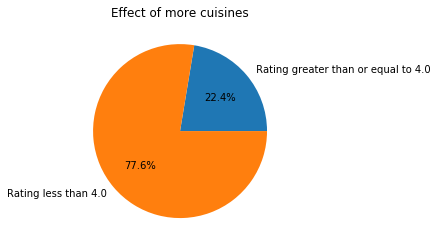

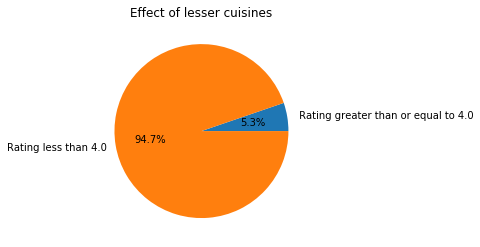

In [20]:
cuisines = dict()
rating = dict()
for i in df1.index:
    temp = df1['Cuisines'][i].split(',')
    if df1['City'][i] == 'New Delhi':
        cuisines[df1['Restaurant Name'][i]] = len(temp)
        rating[df1['Restaurant Name'][i]] = df1['Aggregate rating'][i]

a = 0
b = 0
c = 0
d = 0
for i in cuisines:
    if cuisines[i] >= 4 :
        if rating[i] >= 4:
            a += 1
        else:
            b += 1
    if cuisines[i] < 4 and cuisines[i] > 0:
        if rating[i] >= 4:
            c += 1
        else:
            d += 1

plt.pie([a, b], labels = [' Rating greater than or equal to 4.0', 'Rating less than 4.0'], autopct = '%.1f%%')
plt.title('Effect of more cuisines')
plt.show()
plt.pie([c, d], labels = [' Rating greater than or equal to 4.0', 'Rating less than 4.0'], autopct = '%.1f%%')
plt.title('Effect of lesser cuisines')
plt.show()

3. Average Cost of Restaurant

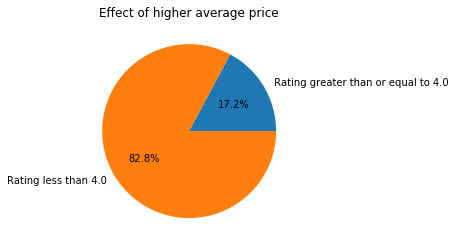

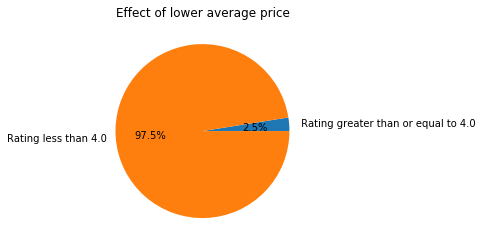

In [150]:
cost = dict()
rating = dict()
for i in df1.index:
    if df1['City'][i] == 'New Delhi':
        cost[df1['Restaurant Name'][i]] = df1['Average Cost for two'][i]
        rating[df1['Restaurant Name'][i]] = df1['Aggregate rating'][i]

a = 0
b = 0
c = 0
d = 0
for i in cost:
    if cost[i] >= 1000:
        if rating[i] > 4:
            a += 1
        else:
            b += 1
    if cost[i] <= 200 and cost[i] > 0:
        if rating[i] >= 4:
            c += 1
        else:
            d += 1

plt.pie([a, b], labels = [' Rating greater than or equal to 4.0', 'Rating less than 4.0'], autopct = '%.1f%%')
plt.title('Effect of higher average price')
plt.show()
plt.pie([c, d], labels = [' Rating greater than or equal to 4.0', 'Rating less than 4.0'], autopct = '%.1f%%')
plt.title('Effect of lower average price')
plt.show()

4. Restaurant serving some specific cuisines.

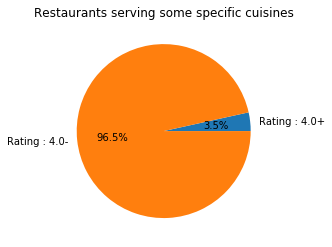

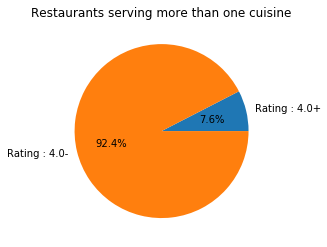

In [30]:
cuisines = dict()
rating = dict()
a = 0
b = 0
c = 0
d = 0
for i in df1.index:
    temp = df1['Cuisines'][i].split(',')
    if df1['City'][i] == 'New Delhi':
        if len(temp) == 1:
            if df1['Aggregate rating'][i] >= 4:
                a += 1
            else:
                b += 1
        else:
            if df1['Aggregate rating'][i] >= 4:
                c += 1
            else:
                d += 1

plt.pie([a, b], labels = ['Rating : 4.0+', 'Rating : 4.0-'], autopct = '%.1f%%')
plt.title('Restaurants serving some specific cuisines')
plt.show()
plt.pie([c, d], labels = ['Rating : 4.0+', 'Rating : 4.0-'], autopct = '%.1f%%')
plt.title('Restaurants serving more than one cuisine')
plt.show()

#### Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating?
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [152]:
local = dict()
vote = dict()
for i in df1.index:
    key = df1['Locality'][i]
    if key in local:
        local[key] += round(df1['Votes'][i]*df1['Aggregate rating'][i], 2)
        vote[key] += df1['Votes'][i]
    else:
        local[key] = round(df1['Votes'][i]*df1['Aggregate rating'][i], 2)
        vote[key] = df1['Votes'][i]
for key in local:
    if local[key] == 0 or vote[key] == 0:
        continue
    local[key] = round(local[key]/vote[key], 2)

local = dict(sorted(local.items(), key = operator.itemgetter(1), reverse = True))
print('Top 10 localities with more weighted restaurant rating...')
a = 0
for key in local:
    if a == 10:
        break
    print('%d. ' %(a+1), key, local[key])
    a += 1

Top 10 localities with more weighted restaurant rating...
1.  Hotel Clarks Amer, Malviya Nagar 4.9
2.  Aminabad 4.9
3.  Friends Colony 4.89
4.  Powai 4.84
5.  Kirlampudi Layout 4.82
6.  Express Avenue Mall,  Royapettah 4.8
7.  Deccan Gymkhana 4.8
8.  Banjara Hills 4.72
9.  Sector 5, Salt Lake 4.71
10.  Riverside Mall, Gomti Nagar 4.7


## Problem - 3
### Visualization

#### Plot the bar graph top 15 restaurants have a maximum number of outlets.

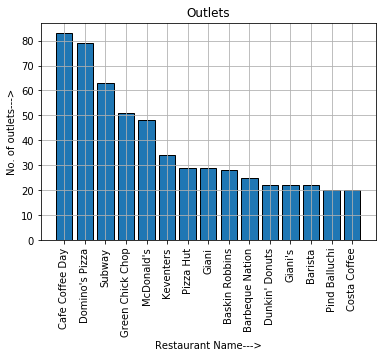

In [31]:
outlet = dict()
for i in df1.index:
    key = df1['Restaurant Name'][i]
    if key in outlet:
        outlet[key] += 1
    else:
        outlet[key] = 1

outlet = dict(sorted(outlet.items(), key = operator.itemgetter(1), reverse = True))
a = 0
x = []
y = []
for i in outlet:
    if a == 15:
        break
    x.append(i)
    y.append(outlet[i])
    a += 1

plt.bar(x, y, edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel('Restaurant Name--->')
plt.ylabel('No. of outlets--->')
plt.title('Outlets')
plt.grid()
plt.show()

#### Plot the histogram of aggregate rating of restaurant( drop the unrated restaurant).

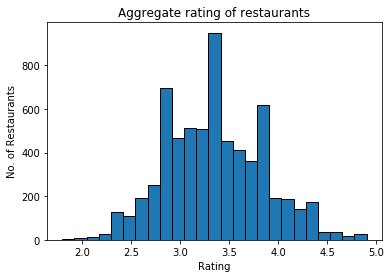

In [32]:
x = []
for i in df1.index:
    if df1['Aggregate rating'][i] == 0:
        continue
    x.append(df1['Aggregate rating'][i])
plt.hist(x, edgecolor = "black", bins = 25)
plt.xlabel('Rating')
plt.ylabel('No. of Restaurants')
plt.title('Aggregate rating of restaurants')
plt.show()

#### Plot the bar graph top 10 restaurants in the data with the highest number of votes.

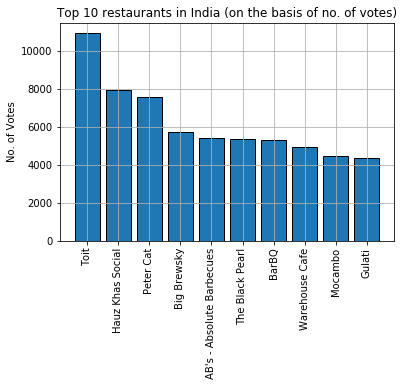

In [180]:
votes = dict()
for i in df1.index:
    key = df1['Restaurant Name'][i]
    votes[key] = df1['Votes'][i]

votes = dict(sorted(votes.items(), key = operator.itemgetter(1), reverse = True))

x = []
y = []
a = 0
for i in votes:
    if a == 10:
        break
    x.append(i)
    y.append(votes[i])
    a += 1

plt.bar(x, y, edgecolor = "black")
plt.xticks(rotation = 90)
plt.title('Top 10 restaurants in India (on the basis of no. of votes)')
plt.ylabel('No. of Votes')
plt.grid()
plt.show()

#### Plot the pie graph of top 10 cuisines present in restaurants in the USA.

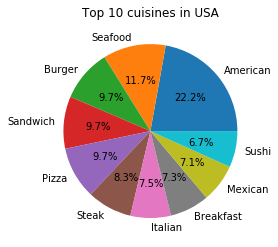

In [33]:
df2 = df[df['Country Code'] == 216]

cuisine = dict()

for i in df2.index:
    temp = df2['Cuisines'][i]
    if type(temp) != str:
        continue
    temp = temp.split(',')
    for key in temp:
        if key.strip() in cuisine:
            cuisine[key.strip()] += 1
        else:
            cuisine[key.strip()] = 1

cuisine = dict(sorted(cuisine.items(), key = operator.itemgetter(1), reverse = True))
x = []
y = []
a = 0
for i in cuisine:
    if a == 10:
        break
    x.append(i)
    y.append(cuisine[i])
    a += 1

plt.pie(y, labels = x, autopct = "%.1f%%")
plt.title('Top 10 cuisines in USA')
plt.show()

#### Plot the bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

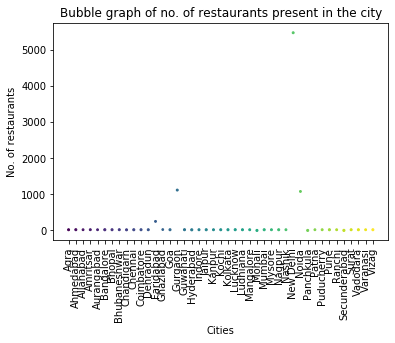

In [35]:
city = dict()
vote = dict()
count = dict()
for i in df1.index:
    key = df1['City'][i]
    if key in city:
        city[key] += round(df1['Votes'][i]*df1['Aggregate rating'][i], 2)
        vote[key] += df1['Votes'][i]
        count[key] += 1
    else:
        city[key] = round(df1['Votes'][i]*df1['Aggregate rating'][i], 2)
        vote[key] = df1['Votes'][i]
        count[key] = 1
for key in city:
    if vote[key] == 0:
        continue
    city[key] = round(city[key]/vote[key], 2)

x = []
y = []
z = []

for i in city:
    x.append(i)
    y.append(city[i])
    z.append(count[i])

c = np.arange(len(x))
plt.scatter(x, z, s = y, c = c)
plt.xticks(rotation = 90)
plt.xlabel('Cities')
plt.ylabel('No. of restaurants')
plt.title('Bubble graph of no. of restaurants present in the city')
plt.show()